# Modelling Latency

## Import Libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import accumulate
from datetime import date
from xml.etree.ElementTree import tostring

## Generate Data

In [13]:
# Feeding data from .csv file
columnNames = ['PacketSequence','txTime', 'rxTime', 'Latency']
csvfile = './data/MECSwareSockperfReadings-Config1-Model/MECSsockperf-end-to-end-1-config1-model.csv'
df = pd.read_csv(csvfile, names=columnNames)

# Obtaining current timestamp
today = date.today()
# dd/mm/YY
dayformatted = today.strftime("%b-%d-%Y")

print("####################################################################\n")
print("Test Date: " + dayformatted + "\n")
print("####################################################################\n")

# Printing the resultant filtered data
print("####################################################################\n")
print("Printing the data obtained from input file:\n")
print(df.to_string())
print("####################################################################\n")


####################################################################

Test Date: Sep-23-2022

####################################################################

####################################################################

Printing the data obtained from input file:

      PacketSequence    txTime    rxTime    Latency
0                  0  2.431680  2.445571   6945.680
1                  1  2.431830  2.445571   6870.694
2                  2  2.431980  2.445571   6795.710
3                  3  2.432130  2.445571   6720.725
4                  4  2.432280  2.445571   6645.742
5                  5  2.432430  2.445571   6570.759
6                  6  2.432580  2.445571   6495.769
7                  7  2.432730  2.445571   6420.780
8                  8  2.432880  2.445571   6345.796
9                  9  2.433030  2.445571   6270.806
10                10  2.433180  2.445571   6195.823
11                11  2.433330  2.445572   6120.839
12                12  2.433480  2.445572   60

## Plotting Line Graph of Latencies

Minimum latency value : 5840.899[micro-sec]

Related Packet Sequence number : 814    814
Name: PacketSequence, dtype: int64

TEXTPOSX :  814
####################################################################

Line Graph:



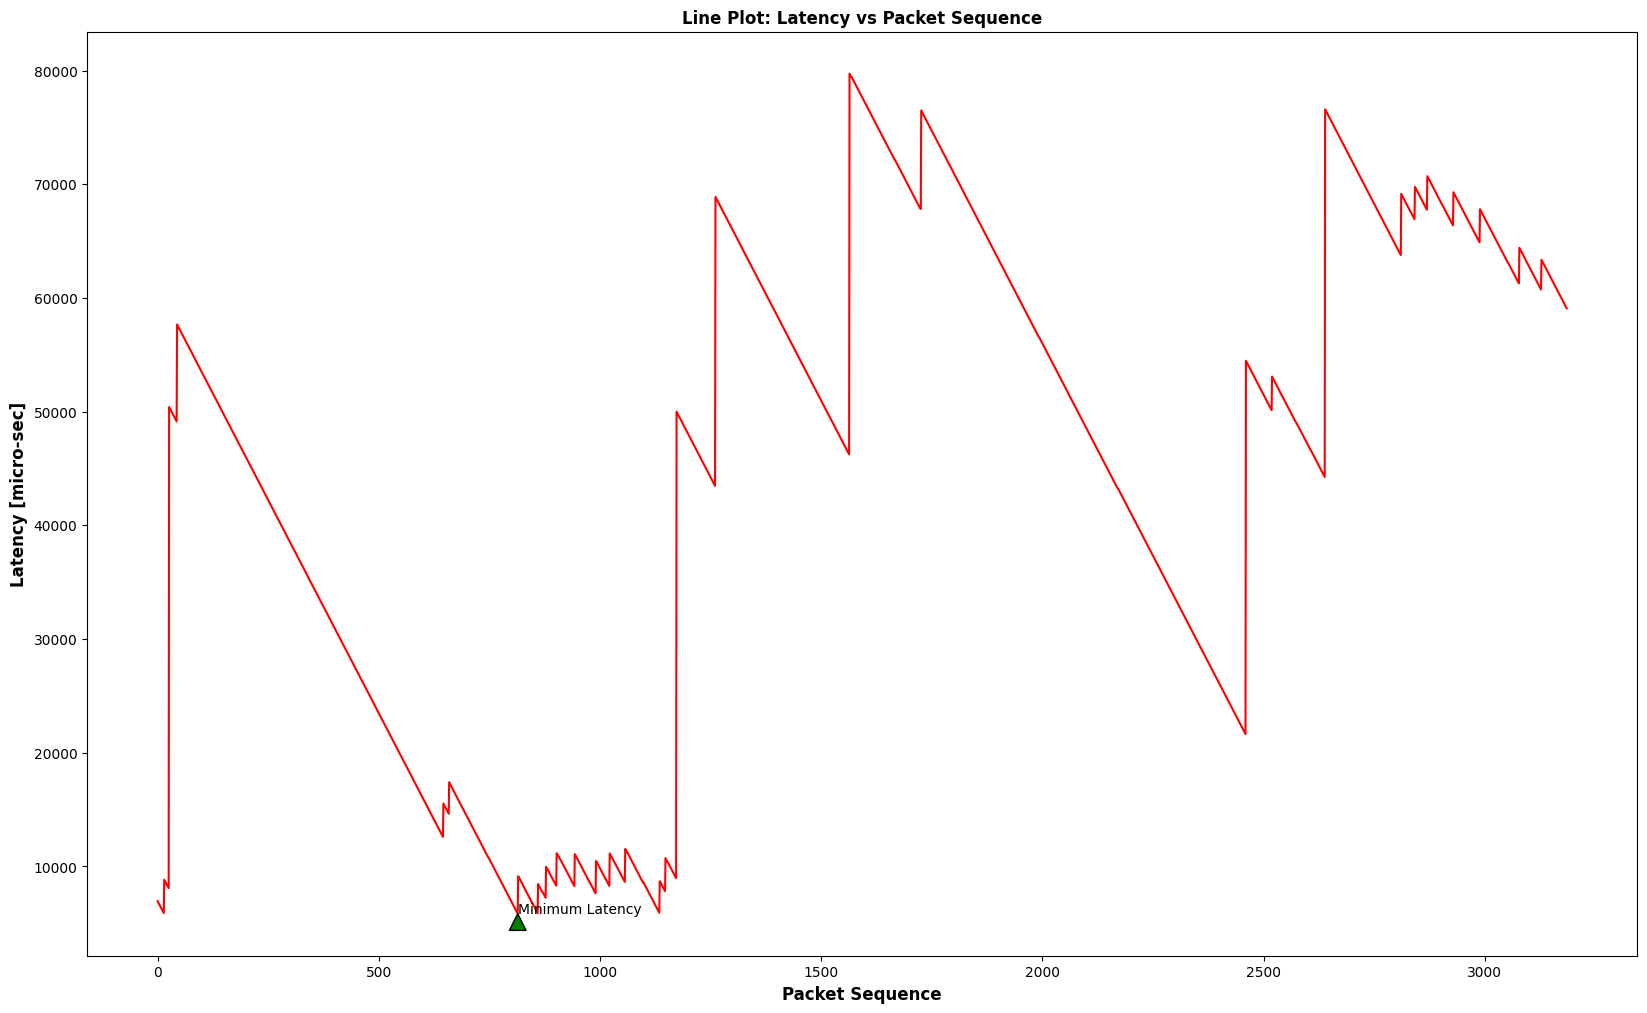

####################################################################



In [14]:

# Annotation
fig1, annotate1 = plt.subplots()
minvalue = df['Latency'].min()
relatedPacketSequence = df.loc[df['Latency'] == minvalue, 'PacketSequence']
print('Minimum latency value : '+ str(minvalue) + '[micro-sec]\n')
print('Related Packet Sequence number : '+ str(relatedPacketSequence) + '\n')
textPosX = int(relatedPacketSequence)
textPosY = int(minvalue)
print('TEXTPOSX : ', textPosX)
annotate1.annotate('Minimum Latency', xy =(float(relatedPacketSequence), int(minvalue)), xytext = (textPosX, textPosY), arrowprops = dict(facecolor ='green'))
# annotate1.set_ylim(-2, 2)

# Plotting Latency vs Packet Sequence
print("####################################################################\n")
print("Line Graph:\n")
plt.plot(df.PacketSequence, df.Latency, color="red")
plt.title("MECSware Line Plot: Latency vs Packet Sequence", fontsize='large', fontweight='bold')
plt.xlabel('Packet Sequence', fontsize='large', fontweight='bold')
plt.ylabel('Latency [micro-sec]', fontsize='large', fontweight='bold')
fig1 = plt.gcf()
fig1.set_size_inches(20, 12, forward=True)
plt.show()
print("####################################################################\n")


## Plotting Bar Graph of Latencies

####################################################################

Bar Graph:



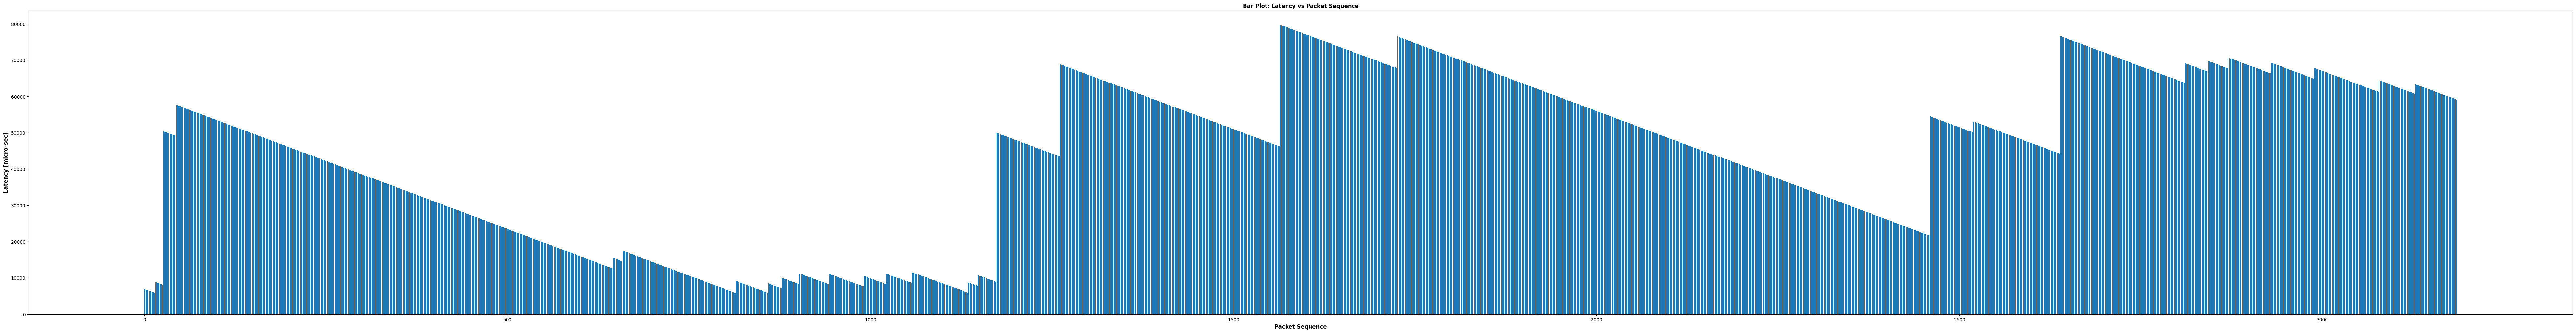

####################################################################



In [15]:
print("####################################################################\n")
print("Bar Graph:\n")
plt.bar(df.PacketSequence, df.Latency)
plt.title("MECSware Bar Plot: Latency vs Packet Sequence", fontsize='large', fontweight='bold')
plt.xlabel('Packet Sequence', fontsize='large', fontweight='bold')
plt.ylabel('Latency [micro-sec]', fontsize='large', fontweight='bold')
fig2 = plt.gcf()
fig2.set_size_inches(100, 12, forward=True)
plt.show()
print("####################################################################\n")

# Saving the plot in mentoned file path
fig1.savefig('./plots/MECSware/MECSsockperfLineGraph-LatencyVsPacketSequence' + dayformatted + '.png', dpi=100, facecolor='white', transparent=False)
fig2.savefig('./plots/MECSware/MECSsockperfBarGraph-LatencyVsPacketSequence' + dayformatted + '.png', dpi=100, facecolor='white', transparent=False)

## Plotting PDF and CDF of Latencies

No of Data points:  3186 

Data: 
 0        6945.680
1        6870.694
2        6795.710
3        6720.725
4        6645.742
          ...    
3181    59388.368
3182    59313.382
3183    59238.325
3184    59163.419
3185    59088.429
Name: Latency, Length: 3186, dtype: float64
Count:  [493 167 184 197 197 434 398 374 529 213] 

No. of bins:  [ 5840.899 13228.946 20616.993 28005.04  35393.087 42781.134 50169.181
 57557.228 64945.275 72333.322 79721.369] 



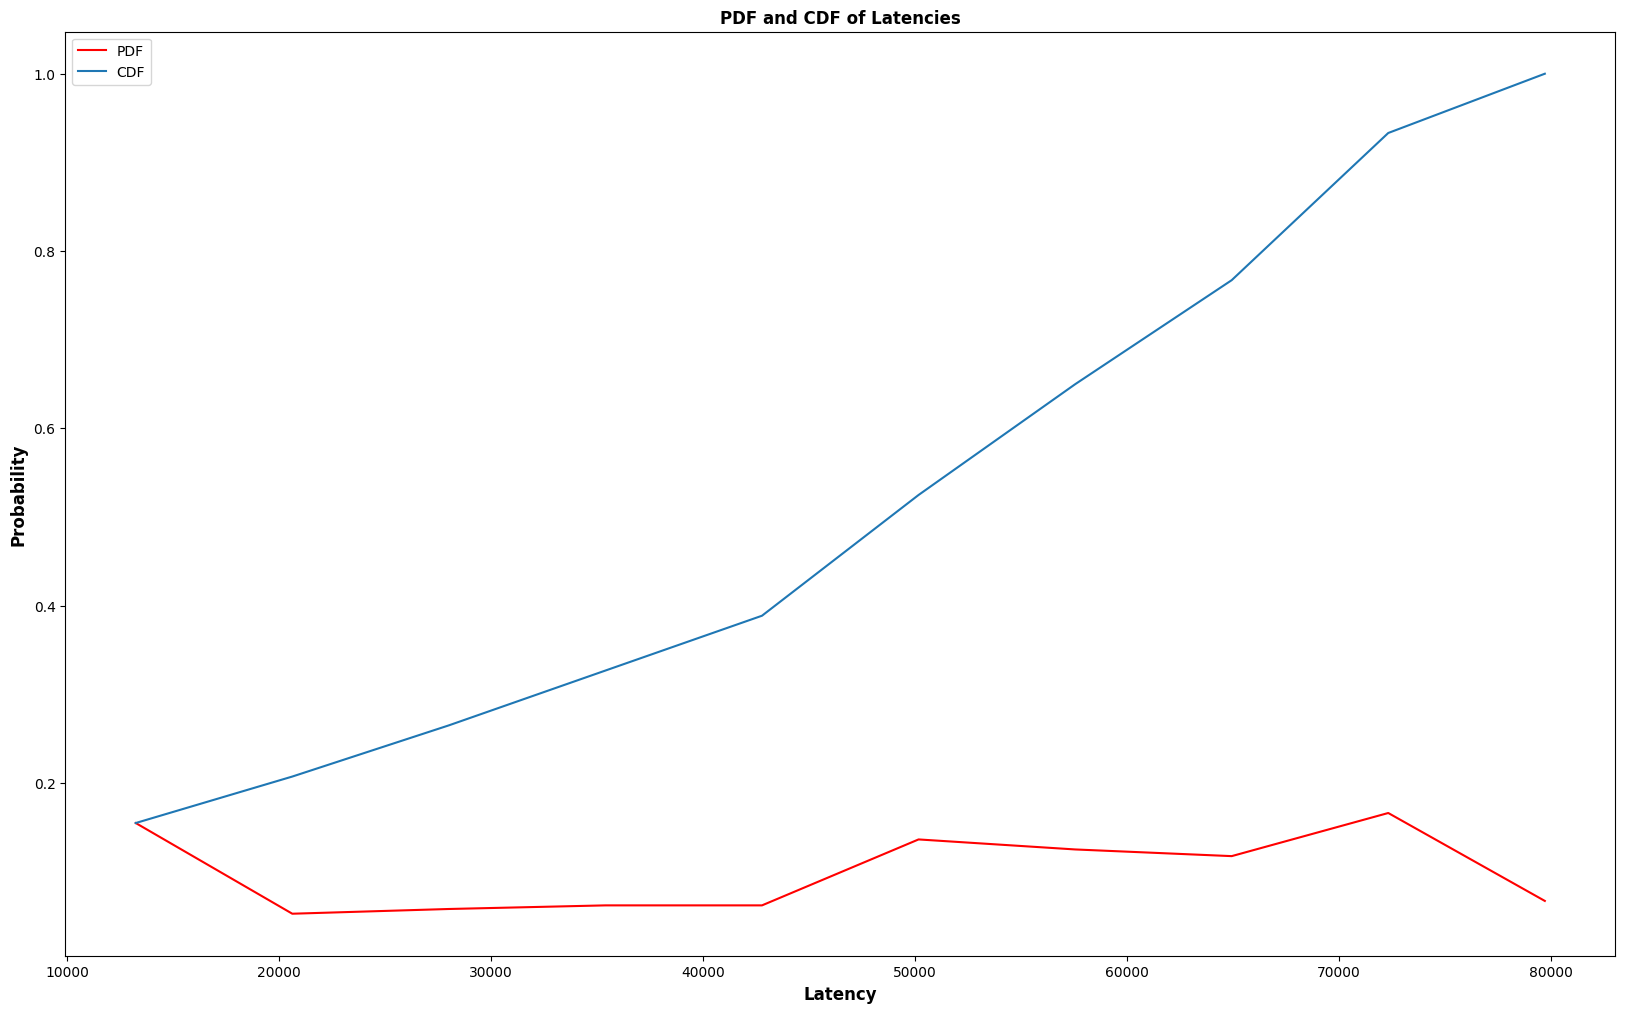

In [16]:


# No of Data points
# N = 500

  
# initializing random values
# data = np.random.randn(N)

#Data to be considered for plotting PDF and CDF
dataPoints = len(df.Latency)
print("No of Data points: ", dataPoints, '\n')
# N = dataPoints
data = df.Latency

print("Data: \n", data)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)

print("Count: ", count, '\n')
print("No. of bins: ", bins_count, '\n')
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
# plt.bar(bins_count[1:], pdf, color="blue", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
# plt.bar(bins_count[1:], cdf, color="red", label="CDF")
plt.legend()
plt.title("MECSware PDF and CDF of Latencies", fontsize='large', fontweight='bold')
plt.xlabel('Latency', fontsize='large', fontweight='bold')
plt.ylabel('Probability', fontsize='large', fontweight='bold')
fig3 = plt.gcf()
fig3.set_size_inches(20, 12, forward=True)
plt.show()

# Saving the plot in mentoned file path
fig3.savefig('./plots/MECSware/MECSsockperf-PDFandCDF' + dayformatted + '.png', dpi=100, facecolor='white', transparent=False)